In [366]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
data=pd.read_csv('Uber Request Data.csv')
df=data.copy()

In [191]:
df.shape
# number of trips is 6745

(6745, 6)

In [192]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [193]:
df.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [195]:

df['Driver id']=df['Driver id'].fillna(0)
# replace na value with zero in request id

In [196]:
df['Driver id']=df['Driver id'].astype('object')
# changew type of driver id to str

In [197]:
df.isna().sum()


Request id              0
Pickup point            0
Driver id               0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

## na values in driver id is 2650

# know trip status of request

In [198]:
requeststate=df[['Request id','Status']].groupby("Status").count()
requeststate


,Request id
Status,
Cancelled,1264
No Cars Available,2650
Trip Completed,2831


## as show above numbers of na values in drivers id is equal to no cars avialable

# Plot a pie chart to show  pick piont precentage

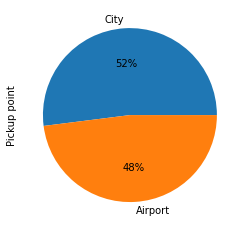

In [199]:
df["Pickup point"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

# Plot a pie chart to show the number of trips of each type

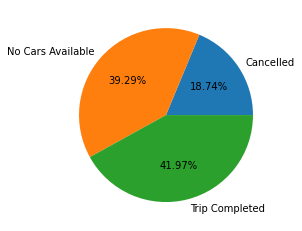

In [200]:
x = np.array([1264, 2650, 2831])

plt.pie(x, labels = ["Cancelled", "No Cars Available", "Trip Completed"] , autopct = '%2.2f%%')
plt.show()

### as show above number of trip cancelled due to no car avialable is 39% so this is big percentage 

# determine days and hour request

In [202]:
df['Request timestamp']=pd.to_datetime(df['Request timestamp'])
df['request hour']=df['Request timestamp'].dt.hour.round()
df['day']=df['Request timestamp'].dt.day_name()
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request hour,day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,11,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,17,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,9,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,21,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8,Wednesday


# show the most day trip cancelled is occur,trip complete and no cars avialable 

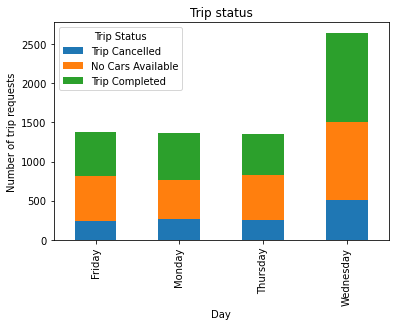

In [168]:
tripday=df[["Request id","Status","day"]].groupby(["day","Status"]).count().unstack()

tripday.plot(kind='bar', stacked=True, legend=True)
plt.xlabel("Day")
plt.ylabel("Number of trip requests")
plt.title("Trip status")
plt.legend(title='Trip Status', loc='upper left', labels=['Trip Cancelled', 'No Cars Available', 'Trip Completed'])
plt.show()

## Trip Status Count -Airport to City - hours of the day

In [ ]:
airportsupdemgap.plot(kind='bar', stacked=True, figsize=[6,5],colormap="winter")
plt.xlabel("Trip request hour")
plt.ylabel("Number of trip requests")
plt.title(" 0000-2300hrs from Airport to City")
plt.legend(title='Trip Status', labels=['Trips Cancelled', 'No Cars Available', 'Trips Completed'],loc='upper center', bbox_to_anchor=(1.35, 0.8), shadow=True, ncol=1)

# find the most duration people request upper

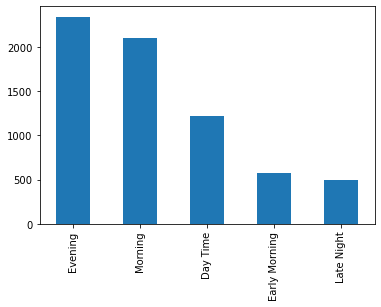

In [369]:
#divide the time of the day into five categories
def period(y):
    if y < 6:
        return "Early Morning"
    elif 6 <= y < 11:
        return "Morning"
    elif 11 <= y < 17:
        return "Day Time"
    elif 17 <= y < 22:
        return "Evening"
    else:
        return "Late Night"

df['Time slot'] = df['request hour'].apply(lambda y: time_period(y))
df['Time slot'].value_counts().plot(kind='bar')
plt.show()


## Demand is more during evening hours

# Availability  for requests with Pickup point as City

In [372]:
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request hour,day,Count,Time slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Monday,1,Day Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Monday,1,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Wednesday,1,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Wednesday,1,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Wednesday,1,Morning


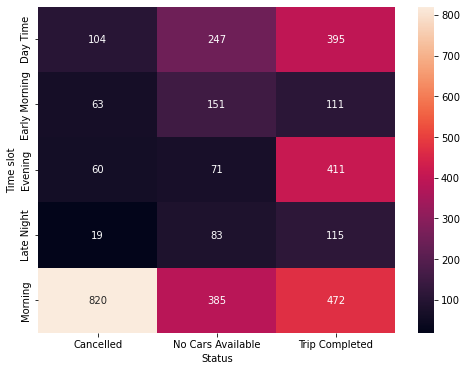

In [371]:
df["Count"] = 1
uber_city = df[df["Pickup point"]=="City"]
uber_airport = df[df["Pickup point"]=="Airport"]
pivot_city = pd.pivot_table(uber_city,index = "Time slot",columns = "Status",values = "Count",aggfunc=np.sum)
plt.figure(figsize = [8,6])
hm = sns.heatmap(data = pivot_city, annot = True, fmt='g')
plt.show()

## Availability matrix for requests with Pickup point as Airport

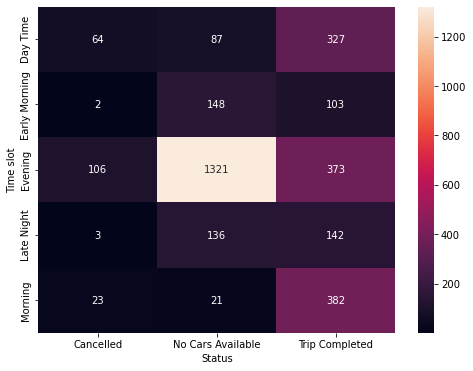

In [374]:
pivot_airport = pd.pivot_table(uber_airport,index = "Time slot",columns = "Status",values = "Count",aggfunc=np.sum)
plt.figure(figsize = [8,6])
hm = sns.heatmap(data = pivot_airport, annot = True, fmt='g')
plt.show()

# find the trip duration 

In [171]:
# df.drop('trip_period',axis=1,inplace=True)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request hour,day,Time slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,11,Monday,Day Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,17,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,9,Wednesday,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,21,Wednesday,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8,Wednesday,Morning


In [314]:
data=df[['Request timestamp','Drop timestamp']].copy()
data.head()

,Request timestamp,Drop timestamp
0,2016-11-07 11:51:00,2016-11-07 13:00:00
1,2016-11-07 17:57:00,2016-11-07 18:47:00
2,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2016-12-07 21:08:00,2016-12-07 22:03:00
4,2016-07-13 08:33:16,2016-07-13 09:25:47


## drop na values rows to get the complete trip 

In [315]:
data.dropna(axis=0,inplace=True)

In [316]:
data.shape

(2831, 2)

## make same format time to Request timestamp and Drop timestamp

In [317]:
data['Request timestamp']=pd.to_datetime(data['Request timestamp'],format='%Y-%m-%d %I-%P')
data['Drop timestamp']=pd.to_datetime(data['Drop timestamp'],format='%Y-%m-%d %I-%P')
data.head()

,Request timestamp,Drop timestamp
0,2016-11-07 11:51:00,2016-11-07 13:00:00
1,2016-11-07 17:57:00,2016-11-07 18:47:00
2,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2016-12-07 21:08:00,2016-12-07 22:03:00
4,2016-07-13 08:33:16,2016-07-13 09:25:47


## calculate trip duration in minute

In [318]:
data['dur_hour']=data['Drop timestamp'].dt.hour-data['Request timestamp'].dt.hour
data['dur_min']=data['Drop timestamp'].dt.minute-data['Request timestamp'].dt.minute
data['dur_sec']=data['Drop timestamp'].dt.second-data['Request timestamp'].dt.second
data['dur_hour']=data['dur_hour'].astype('int')
data['dur_min']=data['dur_min'].astype('int')
data['dur_sec']=data['dur_sec'].astype('int')

In [319]:
data.tail()

,Request timestamp,Drop timestamp,dur_hour,dur_min,dur_sec
2826,2016-11-07 22:54:00,2016-11-07 23:35:00,1,-19,0
2827,2016-07-13 06:31:22,2016-07-13 07:20:52,1,-11,30
2828,2016-07-13 12:33:21,2016-07-13 13:16:03,1,-17,-18
2829,2016-07-13 22:26:08,2016-07-13 23:43:13,1,17,5
2830,2016-07-15 09:07:09,2016-07-15 09:56:07,0,49,-2


In [325]:
data['trip_priod(min)']=data['dur_hour']*60+data['dur_min']+data['dur_sec']/60
data.tail()

,Request timestamp,Drop timestamp,dur_hour,dur_min,dur_sec,trip_priod(min)
2826,2016-11-07 22:54:00,2016-11-07 23:35:00,1,-19,0,41.000000
2827,2016-07-13 06:31:22,2016-07-13 07:20:52,1,-11,30,49.500000
2828,2016-07-13 12:33:21,2016-07-13 13:16:03,1,-17,-18,42.700000
2829,2016-07-13 22:26:08,2016-07-13 23:43:13,1,17,5,77.083333
2830,2016-07-15 09:07:09,2016-07-15 09:56:07,0,49,-2,48.966667


In [347]:
data['trip_priod(min)']=data['trip_priod(min)'].astype('int')
data.head()

,Request timestamp,Drop timestamp,dur_hour,dur_min,dur_sec,trip_priod(min)
0,2016-11-07 11:51:00,2016-11-07 13:00:00,2,-51,0,69
1,2016-11-07 17:57:00,2016-11-07 18:47:00,1,-10,0,50
2,2016-12-07 09:17:00,2016-12-07 09:58:00,0,41,0,41
3,2016-12-07 21:08:00,2016-12-07 22:03:00,1,-5,0,55
4,2016-07-13 08:33:16,2016-07-13 09:25:47,1,-8,31,52


## second method i found to deturmine trip duration (it is easy method)

In [349]:
s=((data['Drop timestamp']-data['Request timestamp']).dt.total_seconds()/60).astype('int')
s.head()

0    69
1    50
2    41
3    55
4    52
dtype: int32

## maximum trip duration

In [340]:
data['trip_priod(min)'].max()

83

In [361]:
data['trip_priod(min)'].min()

-1413

#### what is the problem to make min value nigative

In [360]:
data[data['trip_priod(min)']<0]


,Request timestamp,Drop timestamp,dur_hour,dur_min,dur_sec,trip_priod(min)
75,2016-11-07 23:39:00,2016-12-07 00:23:00,-23,-16,0,-1396
81,2016-07-13 23:58:41,2016-07-14 00:58:39,-23,0,-2,-1380
131,2016-07-15 23:32:44,2016-07-16 00:37:46,-23,5,2,-1374
133,2016-12-07 23:43:00,2016-07-13 00:35:12,-23,-8,12,-1387
143,2016-12-07 23:23:00,2016-07-13 00:27:21,-23,4,21,-1375
...,...,...,...,...,...,...
2769,2016-07-15 23:20:36,2016-07-16 00:10:16,-23,-10,-20,-1390
2790,2016-11-07 23:17:00,2016-12-07 00:15:00,-23,-2,0,-1382
2792,2016-12-07 23:11:00,2016-07-13 00:28:33,-23,17,33,-1362
2812,2016-07-13 23:57:31,2016-07-14 01:02:24,-22,-55,-7,-1375


## this problem occur due to date for example at 23 hour time  and arrive at 0 time

## I will try to solve it and tell you if i can solve it